<a href="https://colab.research.google.com/github/golesuman/66-daysofdatachallenge/blob/main/Day52/gansGeneratingNumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torchvision.datasets as datasets
import torch 
import matplotlib.pyplot as plt
import numpy as np
import torch.optim  as optim
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as transforms
import torch.nn as nn

In [11]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transformer=transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,),
                                                     std=(0.5,))
                                ])

train_data=datasets.MNIST(root='./data',train=True,transform=transformer,download=True)
train_loader=DataLoader(train_data,batch_size=128,shuffle=True)

In [12]:
# defining discriminator Class
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model=nn.Sequential(nn.Linear(784,1024),
                             nn.LeakyReLU(0.2),
                             nn.Dropout(0.3),
                             nn.Linear(1024,512),
                             nn.LeakyReLU(0.2),
                             nn.Dropout(0.3),
                             nn.Linear(512,256),
                             nn.LeakyReLU(0.2),
                             nn.Dropout(0.3),
                             nn.Linear(256,1),
                             nn.Sigmoid()
                             )
    
  def forward(self,x):
    out=self.model(x)
    return out
from torchsummary import summary
discriminator=Discriminator().to(device)
print(discriminator)


Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1, bias=True)
    (10): Sigmoid()
  )
)


In [13]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    self.model=nn.Sequential(
        nn.Linear(100,256),
        nn.LeakyReLU(0.2),
        nn.Linear(256,512),
        nn.LeakyReLU(0.2),
        nn.Linear(512,1024),
        nn.LeakyReLU(0.2),
        nn.Linear(1024,784),
        nn.Tanh()
    )
  def forward(self,x):
    return self.model(x)
generator=Generator().to(device)

print(generator)


Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)


In [14]:
! pip install -q torch_snippets
from torch_snippets import *
from torchvision.utils import make_grid

In [15]:
def noise(size):
  n=torch.randn(size,100)
  return n.to(device)

def discriminator_train(real_data,fake_data):
  d_optimizer.zero_grad()
  prediction_real=discriminator(real_data)
  error_real=loss(prediction_real,torch.ones(len(real_data),1).to(device))
  error_real.backward()
  prediction_fake=discriminator(fake_data)
  error_fake=loss(prediction_fake,torch.zeros(len(fake_data),1).to(device))
  error_fake.backward()
  d_optimizer.step()
  return error_real+error_fake

def generator_train(fake_data):
  g_optimizer.zero_grad()
  prediction=discriminator(fake_data)
  error=loss(prediction,torch.ones(len(real_data),1).to(device))
  error.backward()
  g_optimizer.step()
  return error
discriminator=Discriminator().to(device)
generator=Generator().to(device)
d_optimizer=optim.Adam(discriminator.parameters(),lr=0.0002)
g_optimizer=optim.Adam(generator.parameters(),lr=0.0002)

loss=nn.BCELoss()
num_epochs=15
log=Report(num_epochs)





EPOCH: 1.000	d_loss: 1.059	g_loss: 1.994	(20.04s - 280.57s remaining)
EPOCH: 2.000	d_loss: 1.242	g_loss: 1.651	(39.86s - 259.10s remaining)
EPOCH: 3.000	d_loss: 1.098	g_loss: 1.568	(59.61s - 238.43s remaining)
EPOCH: 4.000	d_loss: 1.052	g_loss: 1.784	(79.49s - 218.59s remaining)
EPOCH: 5.000	d_loss: 0.865	g_loss: 1.802	(99.32s - 198.64s remaining)
EPOCH: 6.000	d_loss: 0.566	g_loss: 2.609	(118.93s - 178.39s remaining)
EPOCH: 7.000	d_loss: 0.573	g_loss: 2.720	(138.51s - 158.29s remaining)
EPOCH: 8.000	d_loss: 0.649	g_loss: 2.414	(158.24s - 138.46s remaining)
EPOCH: 9.000	d_loss: 0.540	g_loss: 2.659	(177.99s - 118.66s remaining)
EPOCH: 10.000	d_loss: 0.634	g_loss: 2.314	(197.79s - 98.89s remaining)
EPOCH: 11.000	d_loss: 0.559	g_loss: 2.618	(217.43s - 79.06s remaining)
EPOCH: 12.000	d_loss: 0.674	g_loss: 2.338	(237.10s - 59.28s remaining)
EPOCH: 13.000	d_loss: 0.638	g_loss: 2.383	(256.79s - 39.51s remaining)
EPOCH: 14.000	d_loss: 0.690	g_loss: 2.191	(276.64s - 19.76s remaining)
EPOCH: 15.0

100%|██████████| 116/116 [00:00<00:00, 211.03it/s]


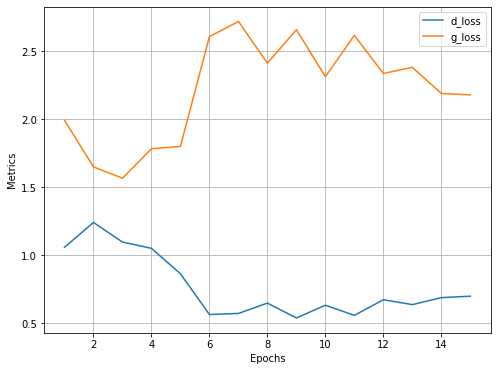

In [16]:
for epoch in range(num_epochs):
  N=len(train_loader)
  for i, (images,_) in enumerate(train_loader):
    real_data=images.view(len(images),-1).to(device)
    fake_data=generator(noise(len(real_data))).to(device)
    fake_data=fake_data.detach()
    d_loss=discriminator_train(real_data,fake_data)
    fake_data=generator(noise(len(real_data))).to(device)
    g_loss=generator_train(fake_data)
    log.record(epoch+(1+i)/N, d_loss=d_loss.item(),g_loss=g_loss.item(),\
               end='\r')
  log.report_avgs(epoch+1)
log.plot_epochs(['d_loss','g_loss'])

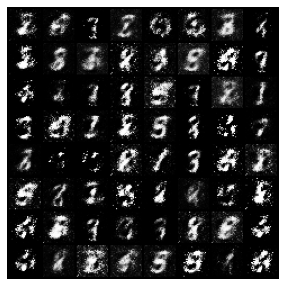

In [17]:
z = torch.randn(64, 100).to(device)
sample_images = generator(z).data.cpu().view(64, 1, 28, 28)
grid = make_grid(sample_images, nrow=8, normalize=True)
show(grid.cpu().detach().permute(1,2,0), sz=5)